This is used to do all of the imports that is required to make stuff work


In [14]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.colors as mcolors



In [5]:
#Get the geojson_file
geojson_fileName="pittsburgh_neighborhoods.geojson"
geojson_filepath=os.path.abspath(geojson_fileName)

In [6]:
#Error Checking to make sure there is a file there
if not os.path.exists(geojson_filepath):
    raise FileNotFoundError(f"GeoJSON file not found: {geojson_filepath}")

# Load the GeoJSON
gdf = gpd.read_file(geojson_filepath)
print("GeoJSON loaded successfully!")

GeoJSON loaded successfully!


In [ ]:
#Options:
#Show the neighborhood names on the map
show_labels=True

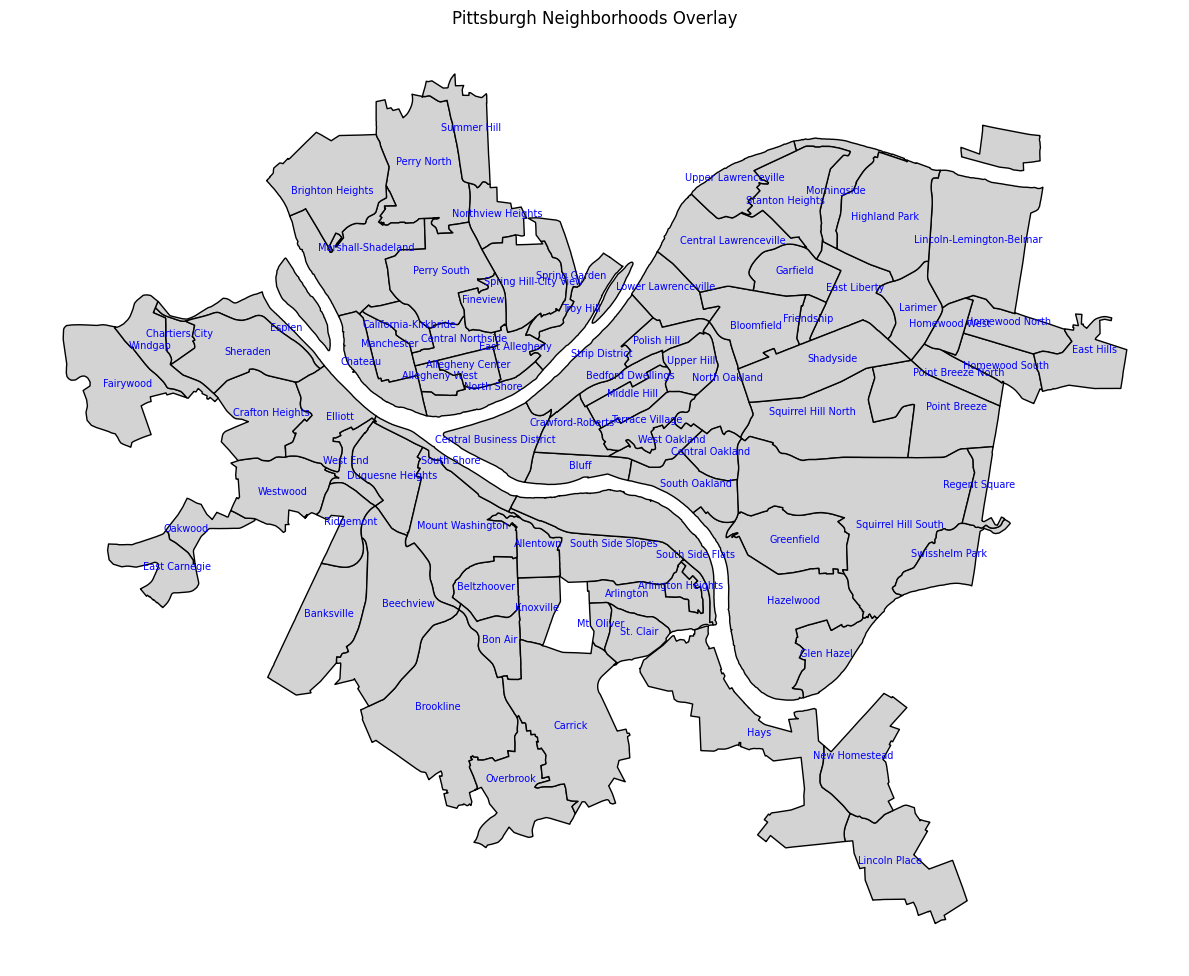

In [ ]:
##Base MAP

ax = gdf.plot(figsize=(12, 12), color='lightgray', edgecolor='black')

name_col = "hood"


if show_labels:
    for idx, row in gdf.iterrows():
        point = row.geometry.representative_point()
        label = str(row[name_col])
        plt.text(point.x, point.y, label, fontsize=7, ha='center', color='blue')

plt.title("Pittsburgh Neighborhoods Overlay")
plt.axis('off')
plt.tight_layout()
plt.show()

**Lets grab our data**


In [16]:
Sales_data=os.path.join(os.getcwd(),'Sales-transaction-2024-geocoded_with_neighborhood.csv')

# Try to load the data
try:
    # Load the CSV file
    df = pd.read_csv(Sales_data)
    print(f"File  loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{Sales_data}' was not found.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

File  loaded successfully!


In [19]:
grouped=df.groupby('neighborhood').size()
print(grouped)

neighborhood
Allegheny Center        3
Allegheny West          3
Allentown              17
Arlington              11
Banksville             10
                       ..
Upper Lawrenceville    22
West End                4
West Oakland           10
Westwood               17
Windgap                 7
Length: 86, dtype: int64


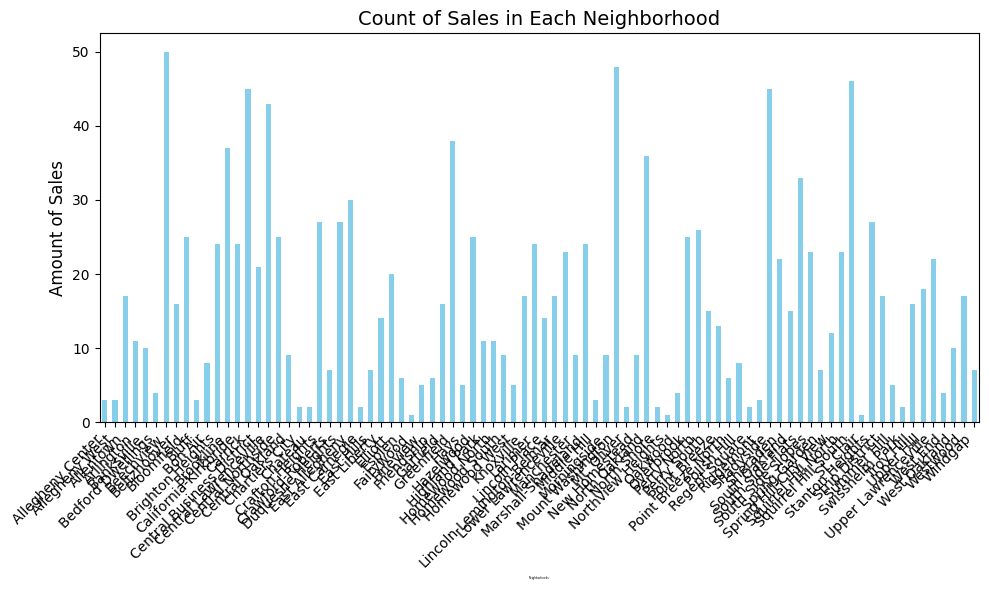

In [22]:
#Make it a graph :)
neighboor_count_sales=grouped

plt.figure(figsize=(10,6))
neighboor_count_sales.plot(kind='bar',color='skyblue')



#This is the labels for the chart

plt.title('Count of Sales in Each Neighborhood',fontsize=14)
plt.xlabel('Neighborhoods',fontsize=2)
plt.ylabel('Amount of Sales',fontsize=12)

plt.xticks(rotation=45,ha='right')


plt.tight_layout()
plt.show()


